In [1]:
import pandas as pd
import numpy as np

In [140]:
data = pd.read_excel("1000 leads.xlsx")
data.head()

,Lead Name,Location,Status,Status information
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn..."
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema..."
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ..."


In [3]:
data.shape

(1001, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lead Name           1001 non-null   object
 1   Location            980 non-null    object
 2   Status              998 non-null    object
 3   Status information  977 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


In [5]:
# checking for the null values
data.isnull().sum()

Lead Name              0
Location              21
Status                 3
Status information    24
dtype: int64

In [6]:
#checking for duplicate values
data.duplicated().sum()

0

# EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data.columns

Index(['Lead Name', 'Location', 'Status ', 'Status information'], dtype='object')

In [9]:
data["Status "].value_counts()

Not Converted    856
Converted        124
NOt Converted     11
Conveted           7
Name: Status , dtype: int64

In [10]:
data["Status "].unique()

array(['Not Converted', 'Converted ', 'NOt Converted', nan, 'Conveted'],
      dtype=object)

In [11]:
data["Status "].replace({"NOt Converted": "Not Converted", "Conveted": "Converted "}, inplace=True)
data["Status "].value_counts()

Not Converted    867
Converted        131
Name: Status , dtype: int64

Data is imbalanced, we gotta balance it

In [12]:
# lead name
len(data["Lead Name"].unique())

878

In [13]:
data[data["Lead Name"].duplicated()==True]["Lead Name"].unique()

array(['ravi', 'Raja', 'Naveen', 'mohit', 'Anand', 'Vishal', 'vinod',
       'Raj', 'Karthik', 'Vijay', 'sathvik', 'Manish', 'suresh',
       'Sandeep', 'Mallesh', 'Deepak', 'Gopal', 'Rupam', 'Abhishek',
       'Arun', 'Ramesh', 'Suresh', 'satya', 'jaswanth', 'Srinivas',
       'Prakash', 'rajesh', 'saurabh', 'Karunakar', 'naveen', 'Aditya',
       'Prashant', 'Hemanth', 'Siva', 'Gowtham', 'Sunil', 'Sudhakar',
       'Rajesh', 'Rashmi', 'Anoop', 'Amit', 'Ashwini', 'Ravi', 'Priyanka',
       'Sachin', 'Raghu', 'Kiran', 'Shyam', 'Surya', 'Vinay', 'srinivas',
       'Nidhi', 'Venkat', 'Nitin', 'Pavan Kumar', 'Rishi', 'gaurav',
       'vivek', 'Divya', 'Ajay', 'Pramod', 'Anil', 'krishna', 'Harini',
       'Anup', 'Kaushik', 'Abdul', 'Maneesh', 'Pavan', 'lakshmi',
       'Basavaraj', 'ashish', 'Shilpa', 'manoj', 'sandeep', 'harish',
       'anil'], dtype=object)

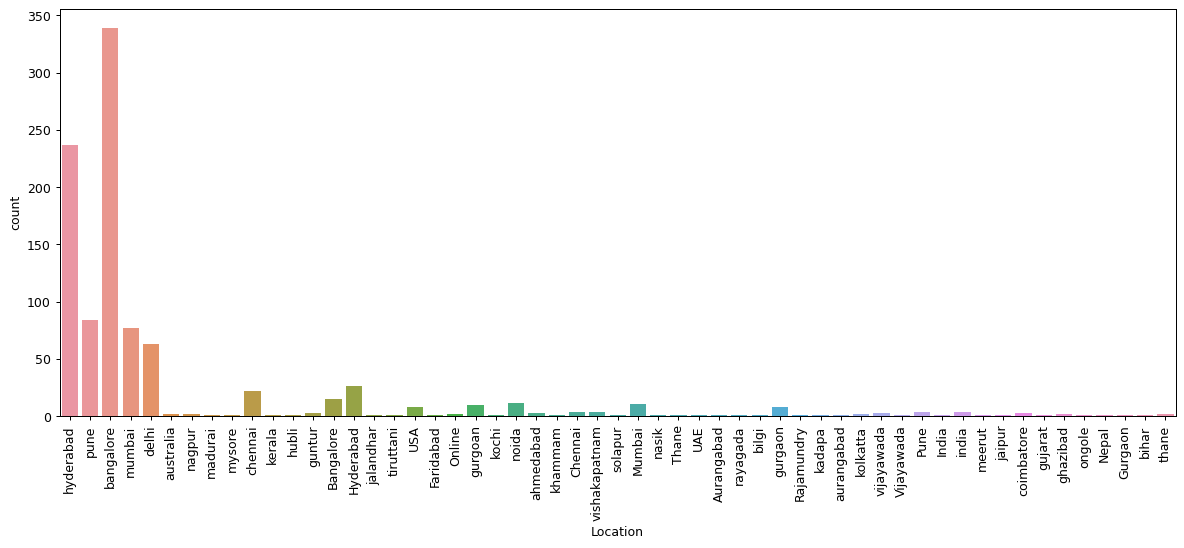

In [14]:
plt.figure(figsize=(16,6), dpi=90)
sns.countplot(data=data, x="Location")
plt.xticks(Rotation="vertical")
plt.show()

Fixing the null values in location with mode

In [15]:
data.loc[data["Location"].isnull(), "Location"] = data["Location"].mode()[0]

In [16]:
data["Location"].mode()[0]

'bangalore'

In [17]:
# lower casing the location column
data["Location"] = data["Location"].apply(lambda x: x.lower())

In [18]:
# fetching country function
def country(x):
  if x == "australia":
    return "australia"
  elif x == "usa":
    return "usa"
  elif x == "uae":
    return "uae"
  else:
    return "india"

In [19]:
data["Country"] = data["Location"].apply(country)

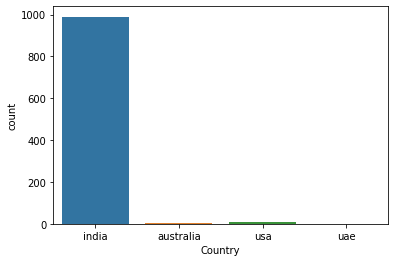

In [20]:
sns.countplot(data=data, x="Country")
plt.show()

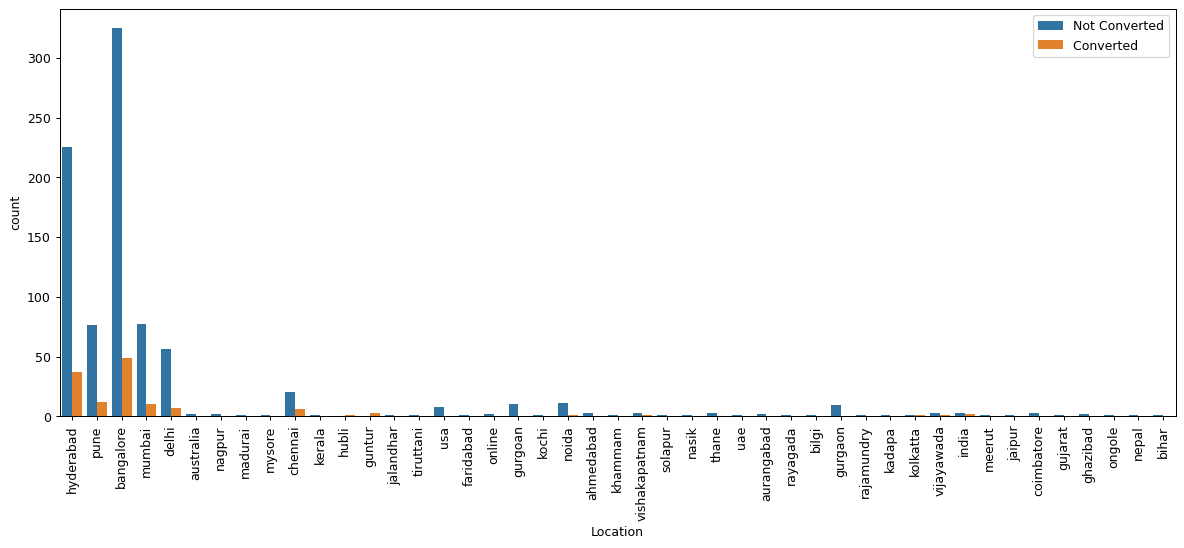

In [21]:
# lets find out what locations have more num of converted/non converted rate
plt.figure(figsize=(16,6), dpi=90)
sns.countplot(data=data, x="Location", hue="Status ")
plt.xticks(Rotation="vertical")
plt.legend(loc="upper right")
plt.show()

In [22]:
data.head()

,Lead Name,Location,Status,Status information,Country
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn...",india
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema...",india
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr,india
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...,india
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ...",india


In [23]:
data["Status information"].isnull().sum()

24

In [24]:
# we will drop the row which have null textual data
data.dropna(inplace=True)

In [25]:
data.isnull().sum()

Lead Name             0
Location              0
Status                0
Status information    0
Country               0
dtype: int64

In [26]:
data["num_char"] = data["Status information"].apply(lambda x: len(x))

<Figure size 1080x540 with 0 Axes>

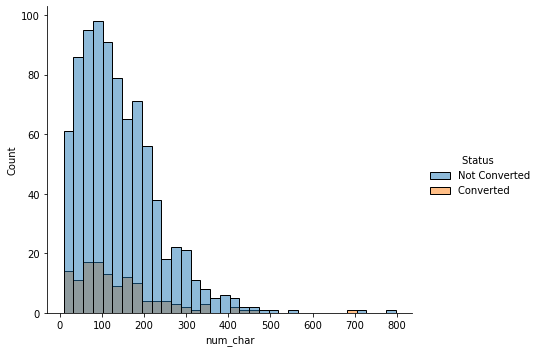

In [27]:
plt.figure(figsize=(12,6), dpi=90)
sns.displot(data=data, x="num_char", hue="Status ", aspect=1.2)
plt.show()

In [28]:
# lets try to find the num of words per converstation
import nltk

In [29]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
for i in data["Status information"][:10]:
  print(i)

14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now
14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification
16|AuG|moHan:rnr
14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server
14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details
12/8/17(Surendra):i will check demo(attended demo) 14/8/17(Surendra):i will get back 17/8/17(Surendra):i will think and respond 23/11/17(Surendra):not interested
14/8/17(Surendra):asking code
11|aUg|moHan:mail shred for ML Tensorflow corprt 16|AuG|moHan:shared but rnr
11|AuG|moHan:askng code
11/8/prema: RNR 11/8/prema: share me tableau recorded session check n revert 12/8/prema: not reachable 14/8/prema: RNR 16/8/prema: have rotational shifts, will check details n co

In [31]:
import string
pun_word = string.punctuation

In [32]:
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# custom stopwords where you will have negative words as well
stop_words2 = [i for i in stop_words if i not in ["not","no", "nor","don't", "aren't",
 "couldn't",
 "didn't",
 "doesn't",
 "hadn't",
 "hasn't",
 "haven't",
 "isn't",
 "mightn't",
 "mustn't",
 "needn't",
 "shouldn't",
 "wasn't",
 "weren't",
 "won't",
 "wouldn't" ]]

In [34]:
data["num_words"] = data["Status information"].apply(lambda x : len([i for i in nltk.word_tokenize(x) if i not in pun_word]))

<Figure size 1080x540 with 0 Axes>

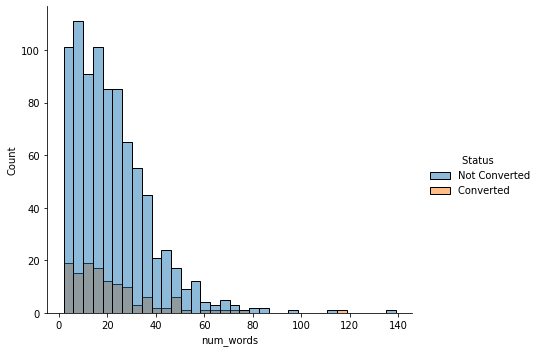

In [35]:
# how many words present in ppl go not converting
plt.figure(figsize=(12,6), dpi=90)
sns.displot(data=data, x="num_words", hue="Status ", aspect=1.2)
plt.show()

In [36]:
for i in data["Status information"][-10:-1]:
  print([x.lower() for x in nltk.word_tokenize(i) if x not in pun_word and x not in stop_words2])

['24/4/17', 'prema', 'cal', '5:30', '18/7/17', 'prema', 'enrolled', 'another', 'course']
['24/apr/mohan', 'not', 'reachble', '25/apr/mohan', 'rnr', '16/may/mohan', 'cal', 'not', 'cntcd', '7/7/17', 'gowtham', 'not', 'lokng', 'right']
['25/4/17', 'surendra', 'share', 'details', 'join', 'tomorrow', '27/4/17', 'surendra', 'join', 'morning', '6:30am', 'early', 'surendra']
['24/4/17', 'prema', 'shared', 'details', '25/4/17', 'prema', 'rnr', '9/5/17', 'prema', 'ct', 'shared', 'details', '12/5/17', 'gowtham', 'tim', 'nedded', '15/6/17', 'soma', 'call', 'disconnected']
['24/apr/mohan', 'rnr', '25/apr/mohan', 'rnr', '16/may/mohan', 'need', 'mrng', 'demo', '7/7/17', 'gowtham', 'enroled', 'wid', 'another', 'inst', 'alomost', 'completed', 'traning']
['25/4/17', 'surendra', 'please', 'send', 'details', 'tomorrow', 'afternoon', '12pm', 'discuss', '12/5/17', 'surendra', 'not', 'connected', '12/5/17', 'gowtham', 'not', 'intrsd']
['24/4/17', 'prema', 'need', 'ct', 'venue', 'far', 'shared', 'details', 'd

In [37]:
# for understanding the spell corrector 
from textblob import TextBlob

In [38]:
for i in data["Status information"][-10:-1]:
  txt = " ".join([x.lower() for x in nltk.word_tokenize(i) if x not in pun_word and x not in stop_words2])
  spell_check = TextBlob(txt)
  txt = spell_check.correct().string
  print(txt)

24/4/17 prima cal 5:30 18/7/17 prima enrolled another course
24/air/moran not readable 25/air/moran and 16/may/moran cal not catch 7/7/17 gowtham not long right
25/4/17 surendra share details join tomorrow 27/4/17 surendra join morning 6:am early surendra
24/4/17 prima shared details 25/4/17 prima and 9/5/17 prima it shared details 12/5/17 gowtham tim needed 15/6/17 some call disconnected
24/air/moran and 25/air/moran and 16/may/moran need man domo 7/7/17 gowtham enrolled wid another inst almost completed trading
25/4/17 surendra please send details tomorrow afternoon pm discuss 12/5/17 surendra not connected 12/5/17 gowtham not intra
24/4/17 prima need it venue far shared details is 25/4/17 prima want venue near banaswadi
24/air/moran intrusted long batch trail per 26/air/moran army red ever
1/5/17 surendra please share details 11/5/17 gowtham already done


TextBlob does a very pathetic job in correcting chat spellings

In [39]:
# with pyspellchecker
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from spellchecker import SpellChecker
sp = SpellChecker()

In [41]:
incorrect_words = sp.unknown([ 'rnr', 'rnr', 'need', 'mrng', 'demo', 'enroled', 'wid', 'another', 'inst', 'alomost', 'completed', 'traning'])

In [42]:
for i in incorrect_words:
  print(sp.correction(i))
  print(sp.candidates(i))

almost
{'almost', 'allmost'}
rne
{'rna', 'rny', 'rne', 'rar', 'unr', 'rer', 'inr', 'ror'}
ming
{'mang', 'mong', 'mrna', 'mung', 'meng', 'ming'}
enrolled
{'enrobed', 'enrolled'}


# Text Preprocessing

In [43]:
import re

In [44]:
data.head()

,Lead Name,Location,Status,Status information,Country,num_char,num_words
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn...",india,133,18
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema...",india,171,27
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr,india,16,2
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...,india,86,13
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ...",india,118,19


In [45]:
df = data.copy()

In [46]:
# label encoding the locations
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
df["Location"] = le.fit_transform(df["Location"])

In [48]:
df["Status "].replace({"Not Converted": 1, "Converted ": 0}, inplace=True)

In [49]:
# 1 = not coverted and 0 = converted
df.head()

,Lead Name,Location,Status,Status information,Country,num_char,num_words
0,Raja,16,1,"14/8/prema: share me details, available in evn...",india,133,18
1,Anirudh Reddy,35,1,"14/8/prema: cal me tmrw, shared details to ema...",india,171,27
2,Sapna Dewani,3,0,16|AuG|moHan:rnr,india,16,2
3,suresh,27,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,india,86,13
4,Akshay Shinde,16,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",india,118,19


In [50]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [52]:
# lets try lemmatization
from nltk.stem import WordNetLemmatizer
lamma = WordNetLemmatizer()
def preprocess2(txt):
  x = txt.lower()
  x = re.sub("\d+[/?]\w+[/?]\w+:|\d+[|]\w+[|]\w+:|\d+[/]\w+[/]\w+[(]\w+[)]:?", "", x)
  x = re.sub("int[a-z]+d$", "interested", x)
  x = re.sub("[\d+-?,'.]", "", x)
  x = [i for i in nltk.word_tokenize(x) if i not in stop_words2 and len(i)>1 and i not in pun_word] # word_tokenization, stop_word/punctuation removal
  x = [lamma.lemmatize(i) for i in x] # there are still a lot of incorrect spellings
  return " ".join(x)

In [53]:
from nltk import PorterStemmer
ps = PorterStemmer()
def preprocess(txt):
  x = txt.lower()
  x = re.sub("\d+[/?]\w+[/?]\w+:|\d+[|]\w+[|]\w+:|\d+[/]\w+[/]\w+[(]\w+[)]:?", "", x)
  x = re.sub("int[a-z]+d$", "interested", x)
  x = re.sub("[\d+-?,'.]", "", x)
  x = [i for i in nltk.word_tokenize(x) if i not in stop_words2 and len(i)>1 and i not in pun_word] # word_tokenization, stop_word/punctuation removal
  x = [ps.stem(i) for i in x] # there are still a lot of incorrect spellings
  return " ".join(x)

In [54]:
for i in data["Status information"][:12]:
  print(i)

14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now
14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification
16|AuG|moHan:rnr
14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server
14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details
12/8/17(Surendra):i will check demo(attended demo) 14/8/17(Surendra):i will get back 17/8/17(Surendra):i will think and respond 23/11/17(Surendra):not interested
14/8/17(Surendra):asking code
11|aUg|moHan:mail shred for ML Tensorflow corprt 16|AuG|moHan:shared but rnr
11|AuG|moHan:askng code
11/8/prema: RNR 11/8/prema: share me tableau recorded session check n revert 12/8/prema: not reachable 14/8/prema: RNR 16/8/prema: have rotational shifts, will check details n co

In [55]:
for i in data["Status information"][:12]:
      print(preprocess2(i))

share detail available evng postponed plan training currently not interested
cal tmrw shared detail email share detail email check revert received email im looking asq certification
rnr
want server cal busy reg server
rnr gave info said revert hr planning next month share detail
check demo attended demo get back think respond not interested
asking code
mail shred ml tensorflow corprt shared rnr
askng code
rnr share tableau recorded session check revert not reachable rnr rotational shift check detail confirm rnr confirm tmrw rnr share detail webinar rd
call pm om meeting cal later rnr webinar weekend shared detail d rnr
im medication back wk ct comfortable share bangalore ofc address home insist join classroom rnr soma want classroom training


In [56]:
for i in data["Status information"][:12]:
      print(preprocess(i))

share detail avail evng postpon plan train current not interest
cal tmrw share detail email share detail email check revert receiv email im look asq certif
rnr
want server cal busi reg server
rnr gave info said revert hr plan next month share detail
check demo attend demo get back think respond not interest
ask code
mail shred ml tensorflow corprt share rnr
askng code
rnr share tableau record session check revert not reachabl rnr rotat shift check detail confirm rnr confirm tmrw rnr share detail webinar rd
call pm om meet cal later rnr webinar weekend share detail ds rnr
im medic back wk ct comfort share bangalor ofc address home insist join classroom rnr soma want classroom train


In [57]:
for i in data["Status information"][-10:-1]:
      print(i)

24/4/17(prema): cal @ 5:30 18/7/17(prema): enrolled for another course
24/Apr/moHan:not reachble 25/Apr/moHan:rnr 16/MaY/moHan:cal not cntcd 7/7/17(gowtham)Not lokng right now
25/4/17(Surendra):share me details i will join tomorrow 27/4/17(Surendra):i will join morning 6:30AM but it is to early surendra
24/4/17(prema): shared details 25/4/17(prema): RNR 9/5/17(prema): CT, shared details 12/5/17(gowtham) tim nedded 15/6/17(soma):call disconnected
24/Apr/moHan:rnr 25/Apr/moHan:rnr 16/MaY/moHan:need mrng demo 7/7/17(gowtham)i enroled wid another inst alomost completed my traning
25/4/17(Surendra):please send me details tomorrow afternoon 12pm we will discuss 12/5/17(Surendra):not connected 12/5/17(gowtham)not intrsd
24/4/17(prema): need CT, but our venue is far. shared details of ds 25/4/17(prema): i want venue near banaswadi
24/Apr/moHan:intrstd in evng batch trail perd 26/Apr/moHan:alrdy reg in exlr
1/5/17(Surendra):please share me details 11/5/17(gowtham)already done


In [58]:
for i in data["Status information"][-10:-1]:
      print(preprocess2(i))

cal enrolled another course
not reachble rnr cal not cntcd not lokng right
share detail join tomorrow join morning early surendra
shared detail rnr ct shared detail tim nedded call disconnected
rnr rnr need mrng demo enroled wid another inst alomost completed traning
please send detail tomorrow afternoon pm discus not connected not interested
need ct venue far shared detail d want venue near banaswadi
intrstd evng batch trail perd alrdy reg exlr
please share detail already done


In [59]:
df["cleaned_txt"] = df["Status information"].apply(preprocess2)

now that we have cleaned the txt, lets correct few specific spellings

In [60]:
# def check(x):
#   txt = re.findall("int[a-z]+d$", x)
#   if len(txt) != 0:
#     return txt[0]
#   else:
#     return "None"

In [61]:
# df["cleaned_txt"].apply(check).value_counts()

In [62]:
in_sp = ["interested","intrstd","intrsd","intrtstd","intrrstd"]
for i in in_sp:
  print(ps.stem(i))

interest
intrstd
intrsd
intrtstd
intrrstd


In [63]:
# we fixed all interested words to its correct spellings becoz we wanted to have topics
# df["cleaned_txt"] = df["cleaned_txt"].apply(lambda x: re.sub("int[a-z]+d$", "interested", x))

In [64]:
df.head()

,Lead Name,Location,Status,Status information,Country,num_char,num_words,cleaned_txt
0,Raja,16,1,"14/8/prema: share me details, available in evn...",india,133,18,share detail available evng postponed plan tra...
1,Anirudh Reddy,35,1,"14/8/prema: cal me tmrw, shared details to ema...",india,171,27,cal tmrw shared detail email share detail emai...
2,Sapna Dewani,3,0,16|AuG|moHan:rnr,india,16,2,rnr
3,suresh,27,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,india,86,13,want server cal busy reg server
4,Akshay Shinde,16,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",india,118,19,rnr gave info said revert hr planning next mon...


In [65]:
for i in df["cleaned_txt"][30:40]:
  print(i)

cacl latr rnr soma asked call tomorrow
call pm iam college iam class
detail shared rnr didnt go mail go revert detail shared soma not interested
detaills shared said next month
shared detail not reachable not right time talk cal evng tied agency
rnr rnr cald many time rnr not interested
rnr rnr call min check evening pm not interested
u number
rnr rnr
need reg clsroom try satdy demo rnr rnr rnr rnr


In [66]:
df["Status "].value_counts()

1    845
0    129
Name: Status , dtype: int64

# Dealing with imbalance data

In [67]:
# Upsampling using resample class
from sklearn.utils import resample

#separating the class
df_major = df[df["Status "]==1]
df_minor = df[df["Status "]==0]

df_minor_upsampled = resample(df_minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=600,    # to match majority class
                                 random_state=20) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_major, df_minor_upsampled], axis=0)

In [68]:
df_upsampled["Status "].value_counts()

1    845
0    600
Name: Status , dtype: int64

# Word Cloud

In [69]:
# a function to get all words
def word_freq(x):
  
  # words that will get stored
  lst = []

  for word in x.split():
    lst.extend(word) # this will add all the words to the list
  
  # make a pandas series so we can apply value_counts()
  words = pd.Series(lst)
  return words

In [70]:
words_freq = word_freq(df[df["Status "]==1]["cleaned_txt"].str)

In [71]:
top_spam_words = words_freq.value_counts().reset_index()[:30]

In [72]:
top_spam_words.head()

,index,0
0,rnr,1084
1,detail,439
2,not,377
3,call,364
4,shared,310


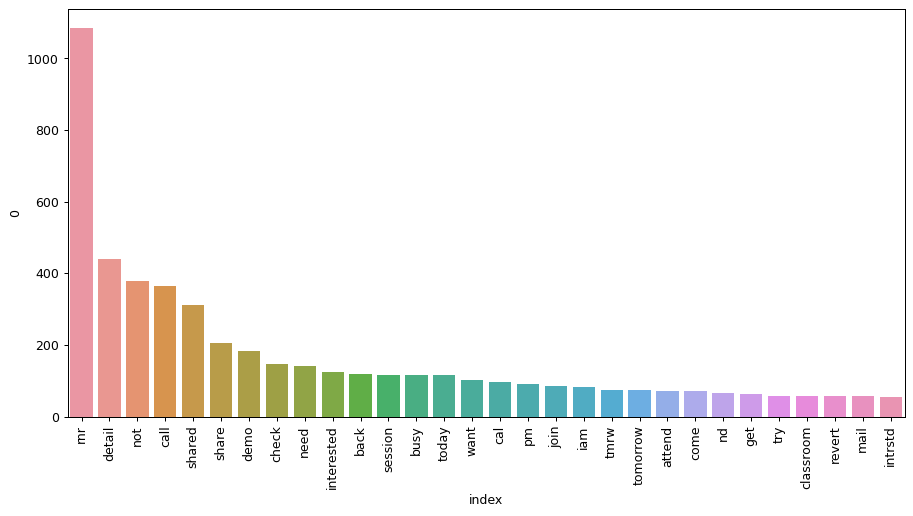

In [73]:
plt.figure(figsize=(12,6), dpi=90)
sns.barplot(data=top_spam_words, x="index", y=0)
plt.xticks(rotation="vertical")
plt.show()

In [74]:
from wordcloud import WordCloud 

In [75]:
# lets create the wordcloud obj
wc = WordCloud(width= 1200, height=800, max_words=30) # this is with removing stop words 
not_converted_wc = wc.generate(df[df["Status "]==1]["cleaned_txt"].str.cat(sep=" "))

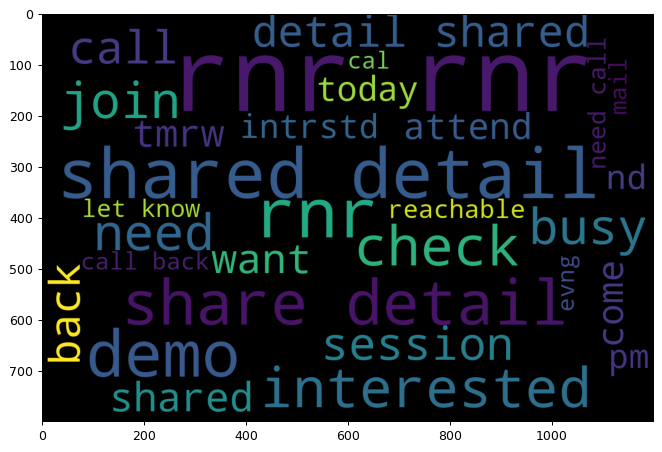

In [76]:
plt.figure(figsize=(18,6), dpi=90)
plt.imshow(not_converted_wc)
plt.show()

In [77]:
converted_wc = wc.generate(df[df["Status "]==0]["cleaned_txt"].str.cat(sep=" "))

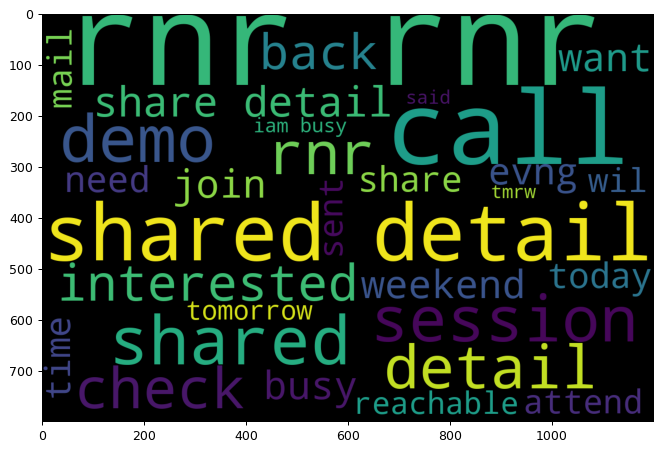

In [78]:
plt.figure(figsize=(18,6), dpi=90)
plt.imshow(converted_wc)
plt.show()

# Task 1 Topic Modeling

In [79]:
# using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf = TfidfVectorizer(max_features=700) # we will use tf for classification
cv = CountVectorizer(max_features=500, ngram_range=(2,2)) # we will use cv for topic modeling

In [80]:
vector_txt2 = cv.fit_transform(df_upsampled["cleaned_txt"])

In [81]:
vector_txt = tf.fit_transform(df_upsampled["cleaned_txt"])

In [82]:
# topic modeling using LDA(latent dirichlet allocation)
from sklearn.decomposition import LatentDirichletAllocation

In [83]:
lda_model = LatentDirichletAllocation(n_components=2,learning_method='online',random_state=42,max_iter=5)

In [84]:
lda_top = lda_model.fit_transform(vector_txt2)

In [85]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  59.69289986299932 %
Topic  1 :  40.30710013700068 %


In [86]:
#Let us check what are the top words that comprise the topics. This would give us a view of what defines each of these topics
topics = dict()
vocab = cv.get_feature_names()
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:9]
     tp = "Topic "+str(i)+": "
    #  print(tp)
     topics[tp] = []
     for t in sorted_words:
       topics[tp].append(t[0])
      #  print(t[0],end=" ")
      #  print("\n")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [87]:
# now we understand what topics will have what words that are being considered
for k,v in topics.items():
  print(f"{k} : {v}")

Topic 0:  : ['rnr rnr', 'shared detail', 'not interested', 'rnr call', 'detail rnr', 'share detail', 'get back', 'rnr shared', 'not connected']
Topic 1:  : ['shared detail', 'share detail', 'detail shared', 'let know', 'coverage area', 'cal back', 'iam not', 'demo detail', 'detail check']


In [88]:
df["Status information"][0]

'14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now'

In [89]:
df["Status "][0]

1

In [90]:
# lets check for document 1
print("Document 1: ")
for i,topic in enumerate(lda_top[1]):
  print("Topic ",i,": ",topic*100,"%")

Document 1: 
Topic  0 :  30.116018275551156 %
Topic  1 :  69.88398172444886 %


In [91]:
print(df["Status information"][1])
print(df["Status "][1])

14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification
1


In [92]:
# lets check for document 2
print("Document 2: ")
for i,topic in enumerate(lda_top[2]):
  print("Topic ",i,": ",topic*100,"%")

Document 2: 
Topic  0 :  50.0 %
Topic  1 :  50.0 %


In [93]:
print(df["Status information"][2])
print(df["Status "][2])

16|AuG|moHan:rnr
0


In [94]:
# lets check for document 3
print("Document 3: ")
for i,topic in enumerate(lda_top[3]):
  print("Topic ",i,": ",topic*100,"%")

Document 3: 
Topic  0 :  22.29398807908741 %
Topic  1 :  77.7060119209126 %


In [95]:
print(df["Status information"][3])
print(df["Status "][3])

14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server
1


In [96]:
# lets check for document 4
print("Document 4: ")
for i,topic in enumerate(lda_top[4]):
  print("Topic ",i,": ",topic*100,"%")

Document 4: 
Topic  0 :  62.23427300046605 %
Topic  1 :  37.765726999533946 %


In [97]:
print(df["Status information"][4])
print(df["Status "][4])

14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details
1


In [98]:
# topic modeling system
def topic_model():
  user_mgs = input("Enter your mgs: ")
  x = preprocess2(user_mgs)
  x = cv.transform([x])
  lda_x = lda_model.transform(x)
  tpic = []
  tpc = lambda x : "not interested" if x == 0 else "interested"
  for i,topic in enumerate(lda_x[0]):
    print("Topic ",i,": ",topic*100,"%")
    tpc_name = tpc(i)
    prc = topic*100
    tpic.append([tpc_name,prc])
  return tpic


In [99]:
print(df["Status information"][600])
print(df["Status "][600])

15/6/17(gowtham)Details shrd 17/6/17(gowtham)RNR 19/6/17(gowtham)cutcall 19/6/17(gowtham)RNR 20/6/17(gowtham)Tim nedded i will tell u
0


In [100]:
my_topic = topic_model()

Enter your mgs: 15/6/17(gowtham)Details shrd 17/6/17(gowtham)RNR 19/6/17(gowtham)cutcall 19/6/17(gowtham)RNR 20/6/17(gowtham)Tim nedded i will tell u
Topic  0 :  83.08866400064964 %
Topic  1 :  16.911335999350346 %


In [101]:
for i in my_topic:
  print(i )

['not interested', 83.08866400064964]
['interested', 16.911335999350346]


In [102]:
topic_model()

Enter your mgs: unable to connect due to network issue 20/7/17(prema): shared details, will check n revert 24/7/17(prema): cal @ 6pm 25/7/prema: share me demo details if psbl wil attend
Topic  0 :  5.453252772820927 %
Topic  1 :  94.54674722717907 %


[['not interested', 5.453252772820927], ['interested', 94.54674722717907]]

In [103]:
print(df_upsampled["Status information"][304])
print(df_upsampled["Status "][304])

12/7/17(prema): unable to connect due to network issue 20/7/17(prema): shared details, will check n revert 24/7/17(prema): cal @ 6pm 25/7/prema: share me demo details if psbl wil attend
1


# Topic Modeling using Gensim(LDA)

In [104]:
import gensim
from gensim import corpora

In [105]:
# creating a clean corpus
corpus = [i.split() for i in df["cleaned_txt"]]

In [106]:
corpus[:5]

[['share',
  'detail',
  'available',
  'evng',
  'postponed',
  'plan',
  'training',
  'currently',
  'not',
  'interested'],
 ['cal',
  'tmrw',
  'shared',
  'detail',
  'email',
  'share',
  'detail',
  'email',
  'check',
  'revert',
  'received',
  'email',
  'im',
  'looking',
  'asq',
  'certification'],
 ['rnr'],
 ['want', 'server', 'cal', 'busy', 'reg', 'server'],
 ['rnr',
  'gave',
  'info',
  'said',
  'revert',
  'hr',
  'planning',
  'next',
  'month',
  'share',
  'detail']]

In [107]:
# creating a dictionary first
dict_ = corpora.Dictionary(corpus)

print(dict_)

Dictionary(1172 unique tokens: ['available', 'currently', 'detail', 'evng', 'interested']...)


In [108]:
# Converting list of documents (corpus) into Document Term Matrix using the dictionary 
doc_term_matrix = [dict_.doc2bow(i) for i in corpus]

In [109]:
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(2, 2),
  (8, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 3),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(21, 1)],
 [(11, 1), (22, 1), (23, 1), (24, 2), (25, 1)],
 [(2, 1),
  (8, 1),
  (18, 1),
  (21, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1)],
 [(4, 1),
  (5, 1),
  (13, 1),
  (33, 1),
  (34, 1),
  (35, 2),
  (36, 1),
  (37, 1),
  (38, 1)],
 [(39, 1), (40, 1)],
 [(19, 1), (21, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)],
 [(40, 1), (46, 1)],
 [(2, 2),
  (5, 1),
  (8, 2),
  (13, 2),
  (18, 1),
  (20, 1),
  (21, 4),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1)],
 [(2, 1),
  (11, 1),
  (19, 1),
  (21, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1)],
 [(8, 1),
  (9, 1),
  (15, 1),
  (21, 1),
  (25, 1),
  (34, 1),
 

Implementing LDA now

In [110]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dict_, passes=1, random_state=0, eval_every=None)

In [111]:
# Prints the topics with the indexes: 0,1 :

ldamodel.print_topics()

# we need to manually check whethere the topics are different from one another or not

[(0,
  '0.138*"rnr" + 0.043*"not" + 0.038*"detail" + 0.032*"call" + 0.023*"share" + 0.019*"shared" + 0.016*"check" + 0.014*"session" + 0.013*"interested" + 0.012*"demo"'),
 (1,
  '0.077*"rnr" + 0.049*"detail" + 0.046*"shared" + 0.039*"call" + 0.029*"not" + 0.025*"demo" + 0.016*"share" + 0.015*"need" + 0.014*"busy" + 0.013*"back"')]

In [112]:
# Extracting Topics
for i in ldamodel.print_topics(num_topics=2, num_words=10):
  print(i)

(0, '0.138*"rnr" + 0.043*"not" + 0.038*"detail" + 0.032*"call" + 0.023*"share" + 0.019*"shared" + 0.016*"check" + 0.014*"session" + 0.013*"interested" + 0.012*"demo"')
(1, '0.077*"rnr" + 0.049*"detail" + 0.046*"shared" + 0.039*"call" + 0.029*"not" + 0.025*"demo" + 0.016*"share" + 0.015*"need" + 0.014*"busy" + 0.013*"back"')


In [113]:
# printing the topic associations with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 [(0, 0.9244522), (1, 0.07554785)]
doc :  1 [(0, 0.70113057), (1, 0.29886943)]
doc :  2 [(0, 0.6873347), (1, 0.31266528)]
doc :  3 [(0, 0.09008284), (1, 0.9099171)]
doc :  4 [(0, 0.06898056), (1, 0.9310195)]
doc :  5 [(0, 0.08384992), (1, 0.9161501)]
doc :  6 [(0, 0.8269016), (1, 0.1730984)]
doc :  7 [(0, 0.0844734), (1, 0.9155266)]
doc :  8 [(0, 0.8101276), (1, 0.18987235)]
doc :  9 [(0, 0.92675954), (1, 0.07324048)]
doc :  10 [(0, 0.10569877), (1, 0.89430124)]
doc :  11 [(0, 0.9028328), (1, 0.09716721)]
doc :  12 [(0, 0.9566593), (1, 0.04334064)]
doc :  13 [(0, 0.2373631), (1, 0.7626369)]
doc :  14 [(0, 0.95174676), (1, 0.048253257)]
doc :  15 [(0, 0.05436116), (1, 0.9456389)]
doc :  16 [(0, 0.79608923), (1, 0.20391078)]
doc :  17 [(0, 0.9216701), (1, 0.07832995)]
doc :  18 [(0, 0.10351881), (1, 0.89648116)]
doc :  19 [(0, 0.053239018), (1, 0.94676095)]
doc :  20 [(0, 0.9047769), (1, 0.09522312)]
doc :  21 [(0, 0.09102791), (1, 0.9089721)]
doc :  22 [(0, 0.90694237), (1, 0.09

# Classification modeling

In [114]:
df_upsampled["Status information"][5]
# df_upsampled["Status "][5]

'12/8/17(Surendra):i will check demo(attended demo) 14/8/17(Surendra):i will get back 17/8/17(Surendra):i will think and respond 23/11/17(Surendra):not interested'

In [115]:
df_upsampled.head()

,Lead Name,Location,Status,Status information,Country,num_char,num_words,cleaned_txt
0,Raja,16,1,"14/8/prema: share me details, available in evn...",india,133,18,share detail available evng postponed plan tra...
1,Anirudh Reddy,35,1,"14/8/prema: cal me tmrw, shared details to ema...",india,171,27,cal tmrw shared detail email share detail emai...
3,suresh,27,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,india,86,13,want server cal busy reg server
4,Akshay Shinde,16,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",india,118,19,rnr gave info said revert hr planning next mon...
5,Karthik,27,1,12/8/17(Surendra):i will check demo(attended d...,india,161,25,check demo attended demo get back think respon...


In [116]:
add_col = df_upsampled["Location"].values.reshape(-1,1)

In [117]:
vector_txt.toarray().shape

(1445, 700)

In [118]:
x = vector_txt.toarray()
y = df_upsampled["Status "]

In [119]:
# train, test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=30)
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

(1156, 700)
(289, 700)
(1156,)
(289,)


In [120]:
# evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score

# navie bayes models
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

#others
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [121]:
# creating a dictionary to keep records
results = dict()
results["Algorithm"] = []
results["Accuracy"] = []
results["Precision"] = []

In [122]:
for i in [BernoulliNB(), MultinomialNB(), GaussianNB()]:
  model = i.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  print(f"Algo: {i}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")
  results["Algorithm"].append(i)
  results["Accuracy"].append(acc)
  results["Precision"].append(p_s)

Algo: BernoulliNB()
acc: 0.7508650519031141

-------------------------------------------------------
[[ 70  59]
 [ 13 147]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.54      0.66       129
           1       0.71      0.92      0.80       160

    accuracy                           0.75       289
   macro avg       0.78      0.73      0.73       289
weighted avg       0.77      0.75      0.74       289


Algo: MultinomialNB()
acc: 0.7958477508650519

-------------------------------------------------------
[[ 76  53]
 [  6 154]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.59      0.72       129
           1       0.74      0.96      0.84       160

    accuracy                           0.80       289
   macro avg       0.84      0.78      0.78       289
weighted avg       0.83      0.80   

# Ensembling technique

In [123]:
for i in [ExtraTreesClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]:
  model = i.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  print(f"Algo: {i}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")
  results["Algorithm"].append(i)
  results["Accuracy"].append(acc)
  results["Precision"].append(p_s)

Algo: ExtraTreesClassifier()
acc: 0.9688581314878892

-------------------------------------------------------
[[124   5]
 [  4 156]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       129
           1       0.97      0.97      0.97       160

    accuracy                           0.97       289
   macro avg       0.97      0.97      0.97       289
weighted avg       0.97      0.97      0.97       289


Algo: RandomForestClassifier()
acc: 0.9688581314878892

-------------------------------------------------------
[[124   5]
 [  4 156]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       129
           1       0.97      0.97      0.97       160

    accuracy                           0.97       289
   macro avg       0.97      0.97      0.97       289
weighted avg      

# SMV Classifier & Logistic Reg

In [124]:
for i in [SVC(), LogisticRegression(max_iter=1000)]:
  model = i.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  print(f"Algo: {i}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")
  results["Algorithm"].append(i)
  results["Accuracy"].append(acc)
  results["Precision"].append(p_s)

Algo: SVC()
acc: 0.9342560553633218

-------------------------------------------------------
[[118  11]
 [  8 152]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       129
           1       0.93      0.95      0.94       160

    accuracy                           0.93       289
   macro avg       0.93      0.93      0.93       289
weighted avg       0.93      0.93      0.93       289


Algo: LogisticRegression(max_iter=1000)
acc: 0.8200692041522492

-------------------------------------------------------
[[ 87  42]
 [ 10 150]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.67      0.77       129
           1       0.78      0.94      0.85       160

    accuracy                           0.82       289
   macro avg       0.84      0.81      0.81       289
weighted avg       0.83   

In [125]:
pd.DataFrame(results) #without location invovled

,Algorithm,Accuracy,Precision
0,BernoulliNB(),0.750865,0.713592
1,MultinomialNB(),0.795848,0.743961
2,GaussianNB(),0.705882,0.962963
3,"(ExtraTreeClassifier(random_state=538674400), ...",0.968858,0.968944
4,"(DecisionTreeClassifier(max_features='auto', r...",0.968858,0.968944
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.726644,0.709845
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.830450,0.790576
7,SVC(),0.934256,0.932515
8,LogisticRegression(max_iter=1000),0.820069,0.781250


In [126]:
pd.DataFrame(results)

,Algorithm,Accuracy,Precision
0,BernoulliNB(),0.750865,0.713592
1,MultinomialNB(),0.795848,0.743961
2,GaussianNB(),0.705882,0.962963
3,"(ExtraTreeClassifier(random_state=538674400), ...",0.968858,0.968944
4,"(DecisionTreeClassifier(max_features='auto', r...",0.968858,0.968944
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.726644,0.709845
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.830450,0.790576
7,SVC(),0.934256,0.932515
8,LogisticRegression(max_iter=1000),0.820069,0.781250


SO we came to understand that TF-IDF works well for classification of customer wherther the'll be converted or not

and Count vectorizer is working great for topic modeling

So i will consider both for my deployment(POC)

# Classification system

In [127]:
  model = ExtraTreesClassifier()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  print(f"Algo: {model}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")

Algo: ExtraTreesClassifier()
acc: 0.9619377162629758

-------------------------------------------------------
[[124   5]
 [  6 154]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       129
           1       0.97      0.96      0.97       160

    accuracy                           0.96       289
   macro avg       0.96      0.96      0.96       289
weighted avg       0.96      0.96      0.96       289




In [128]:
  model2 = SVC()
  model2.fit(x_train, y_train)
  y_pred = model2.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  print(f"Algo: {model2}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")

Algo: SVC()
acc: 0.9342560553633218

-------------------------------------------------------
[[118  11]
 [  8 152]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       129
           1       0.93      0.95      0.94       160

    accuracy                           0.93       289
   macro avg       0.93      0.93      0.93       289
weighted avg       0.93      0.93      0.93       289




In [129]:
# gaussain NB
model3 = GaussianNB()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
acc = accuracy_score(y_test, y_pred)
con_m = confusion_matrix(y_test, y_pred)
c_r = classification_report(y_test, y_pred)
p_s = precision_score(y_test, y_pred)
print(f"Algo: {model3}")
print(f"acc: {acc}\n")
print("-"*55)
print(f"{con_m}\n")
print("-"*55)
print(f"{c_r}\n")

Algo: GaussianNB()
acc: 0.7058823529411765

-------------------------------------------------------
[[126   3]
 [ 82  78]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.98      0.75       129
           1       0.96      0.49      0.65       160

    accuracy                           0.71       289
   macro avg       0.78      0.73      0.70       289
weighted avg       0.80      0.71      0.69       289




In [130]:
# multinomial
model4 = BernoulliNB()
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
acc = accuracy_score(y_test, y_pred)
con_m = confusion_matrix(y_test, y_pred)
c_r = classification_report(y_test, y_pred)
p_s = precision_score(y_test, y_pred)
print(f"Algo: {model4}")
print(f"acc: {acc}\n")
print("-"*55)
print(f"{con_m}\n")
print("-"*55)
print(f"{c_r}\n")

Algo: BernoulliNB()
acc: 0.7508650519031141

-------------------------------------------------------
[[ 70  59]
 [ 13 147]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.54      0.66       129
           1       0.71      0.92      0.80       160

    accuracy                           0.75       289
   macro avg       0.78      0.73      0.73       289
weighted avg       0.77      0.75      0.74       289




In [131]:
#classification system
def Status(user):
  x = user
  x = preprocess2(x)
  x = tf.transform([x])
  x = model3.predict(x.toarray())
  if x == 1:
    return "Not Convertable"
  else:
    return "Convertable"

In [132]:
j = "3/3/12roahn hello miss jawsal 3/3/12 yes, needed service i can pay immediately"

In [133]:
mgs = input()
Status(mgs)

he will revert in 24hrs, he is planning for next mount


'Convertable'

In [134]:
for i in [200,221,222,608,610,567]:
  print(df.loc[i,"Status information"])
  print(df.loc[i,"Status "])

24/7/prema: RNR 25/7/prema: rnr 29/7/prema: nr 1/8/prema: rnr ; sms sent 4/8/prema: inquired regarding the placements and live internship
1
20/7/prema: jus equired to know 25/7/prema: rnr 26/7/prema: already enrolled with other institute for ct
1
20/JulY/moHan:need sql
1
10/6/17(gowtham)Not connecting 21/6/17(gowtham)Not cnnctng 20/7/17(soma):calling from Unregistered number
0
8/6/17(Surendra):call me after some time iam busy now 12/6/17(Surendra):share me details i will check evening session 13/6/17(Surendra):call me after iam busy 1/8/17(Surendra):i will come share me details
0
19/6/17(gowtham)informed aftr checking demo he will cnfrm
0


# Pickle files

In [142]:
import pickle

#pickling the topic modeling files
pickle.dump(cv, open("cv_vectorizer.pkl", "wb"))
pickle.dump(lda_model, open("lda_model.pkl", "wb"))
files.download("cv_vectorizer.pkl")
files.download("lda_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [143]:
pickle.dump(stop_words2, open("stopwords.pkl","wb"))
files.download("stopwords.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [144]:
# pickling for classification POC
import pickle

pickle.dump(tf, open("tf_vectorizer.pkl","wb"))
pickle.dump(model3, open("GNB.pkl","wb"))
files.download("tf_vectorizer.pkl")
files.download("GNB.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>